In [4]:
import pandas as pd

In [5]:
##Reading csv file
respiratory = pd.read_csv('respiratory.csv')
respiratory.head

<bound method NDFrame.head of       Age  Rate
0     0.1    53
1     0.2    38
2     0.3    58
3     0.3    52
4     0.3    42
..    ...   ...
613  35.9    21
614  35.9    22
615  36.0    24
616  36.0    27
617  36.0    31

[618 rows x 2 columns]>

In [6]:
import matplotlib.pyplot as plt

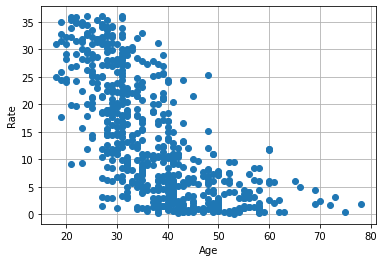

In [7]:
##Creating scatterplot
plt.plot('Rate', 'Age', 'o', data = respiratory)
plt.xlabel('Age')
plt.ylabel('Rate')
plt.grid()
plt.show()

In [ ]:
##Based on the scatter plot above, there seems to be a relationship between age and respiratory rate. The values appear to curve downward and flatten as age increases

In [8]:
import statsmodels.formula.api as smf

In [9]:
## Building the linear model
lm_md = smf.ols(formula = 'Rate ~ Age', data = respiratory).fit()
lm_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     560.9
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           1.17e-88
Time:                        18:57:26   Log-Likelihood:                -2148.7
No. Observations:                 618   AIC:                             4301.
Df Residuals:                     616   BIC:                             4310.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.0522      0.504     93.317      0.000      46.062      48.042
Age           -0.6957      0.029    -23.684      0.000      -0.753      -0.638
==============================================================================
Omnibus:                       45.826   Durbin-Watson:                   1.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.994
Skew:                           0.618   Prob(JB):                     1.55e-13
Kurtosis:                       3.873   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
## B0 is 47.0522. B1 is -0.6957

In [10]:
##Fitting to linear regression model
md = smf.ols(formula = 'Rate ~ Age', data = respiratory)
results = md.fit()

In [11]:
##Calculating the results
residuals = respiratory['Rate'] - results.fittedvalues

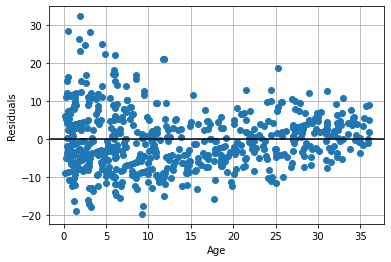

In [12]:
## Plotting to check for linearity, Exercise D
plt.plot(respiratory['Age'], residuals, 'o')
plt.axhline(y = 0, color = 'black')
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.grid()

In [41]:
## Based on the scatterplot above, not a random plot of values. There appears to be a pattern of a "Nike swoosh" trending upwards in the data, so assumption would not be met.

In [13]:
import numpy as np

In [14]:
##Adding new log values to data frame
respiratory['log_rate'] = np.log(respiratory['Rate'])


In [15]:
## Creating a log-linear model of log age and rate
lm_md = smf.ols(formula = 'log_rate ~ Age', data = respiratory).fit()
lm_md.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               log_rate   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     667.6
Date:                Tue, 19 Oct 2021   Prob (F-statistic):          2.74e-100
Time:                        18:58:26   Log-Likelihood:                 129.96
No. Observations:                 618   AIC:                            -255.9
Df Residuals:                     616   BIC:                            -247.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8451      0.013    304.500      0.000       3.820       3.870
Age           -0.0190      0.001    -25.839      0.000      -0.020      -0.018
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.242
Skew:                          -0.030   Prob(JB):                        0.886
Kurtosis:                       2.924   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
lm_md = smf.ols(formula = 'Rate ~ Age', data = respiratory).fit()
newdata = pd.DataFrame({'Age':[5]})
lm_md.predict(newdata)

## Looking at the model done in part D, the respiratory rate of a 5 month child would be around 43.57 breaths per minute.

0    43.573596
dtype: float64